In [9]:
from scipy.signal import correlate
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import os
import sys
import plotly.graph_objects as go 
dir_path = os.path.abspath('')
sys.path.append(dir_path + '/../')
from labbiofisica import Interpolazione, final_val

In [10]:
# Carico i dati {θ: {x: [], y: []}}

data = {}

TETA = np.array([50,60,70,80,90,100,110,120,130])
GAMMA = []
sigmaGAMMA = []

# t convertito in secondi, si considerano dati solo tra 0.1 e 10 ms a causa del rumore
for θ in TETA:
    filename = f'./data/I_{θ}.txt'

    read = pd.read_csv(filename,sep='\t ',header=None,engine='python')
    #read = read[(read[0] >= 0.1) & (read[0] <= 10)] # filtro i dati

    θ = 180 - θ
    data[θ] = {'t':read[0].to_numpy()/1000,'I':read[1].to_numpy(),'sigma=': np.float64(0.001)} # converto in secondi

TETA = 180 - TETA # inverto angoli supplementari

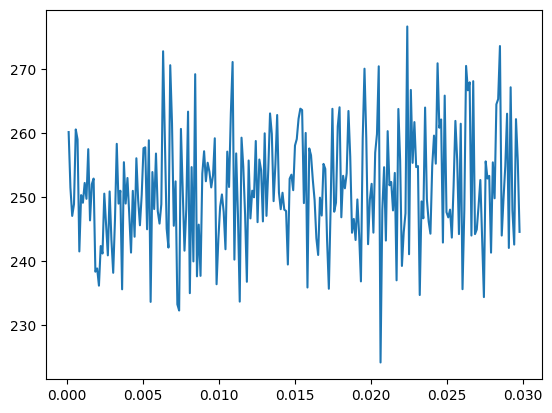

In [11]:
x = data[50]['t']
y = data[50]['I']

# y -= np.mean(y)
#y = (y)#/np.var(y)

plt.plot(x,y)
plt.show()

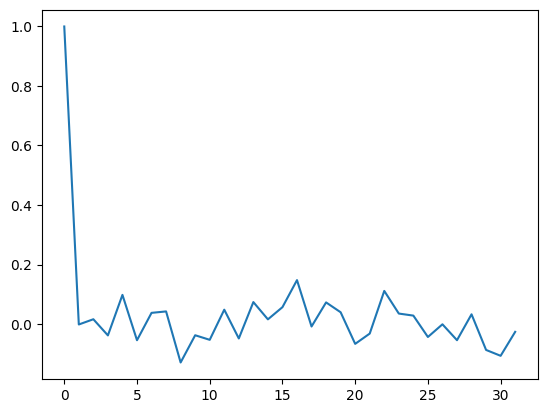

In [12]:
import statsmodels.api as sm
g = sm.tsa.stattools.acf(np.concatenate([y,y,y,y,y,y]))

# g = np.abs(np.correlate(y,y,'full')[len(y)-1:])
# g = g / np.var(y) / len(y)
plt.plot(g)
plt.show()